#  **Coleta e Preparação dos Dados (ETL)**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('/content/dados_tratados.csv')

# Exibe as primeiras linhas do Dataframe
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,contas_diarias,quantidade_servicos
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.19,0
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,2.00,0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.46,0
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.27,0
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.80,0


In [12]:
# Exibe as informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   churn                7032 non-null   int64  
 1   gender               7032 non-null   object 
 2   senior_citizen       7032 non-null   int64  
 3   partner              7032 non-null   int64  
 4   dependents           7032 non-null   int64  
 5   tenure               7032 non-null   int64  
 6   phone_service        7032 non-null   int64  
 7   multiple_lines       7032 non-null   object 
 8   internet_service     7032 non-null   object 
 9   online_security      7032 non-null   object 
 10  online_backup        7032 non-null   object 
 11  device_protection    7032 non-null   object 
 12  tech_support         7032 non-null   object 
 13  streaming_tv         7032 non-null   object 
 14  streaming_movies     7032 non-null   object 
 15  contract             7032 non-null   o

In [13]:

# Converte colunas numéricas para o tipo adequado
df['charges_monthly'] = pd.to_numeric(df['charges_monthly'], errors='coerce')
df['charges_total'] = pd.to_numeric(df['charges_total'], errors='coerce')


In [14]:
# Aplica One-Hot Encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)


##  **Limpeza e pré processamento de dados**




In [5]:
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total', 'contas_diarias',
       'quantidade_servicos'],
      dtype='object')


In [8]:
# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar novamente os nomes das colunas
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total', 'contas_diarias',
       'quantidade_servicos'],
      dtype='object')


In [9]:
df.columns = df.columns.str.replace('\xa0', ' ')  # Substitui espaços não separáveis por espaços normais


In [10]:
total_charges = df.get('charges_total')
if total_charges is not None:
    print(total_charges)
else:
    print("Coluna 'charges_total' não encontrada.")


0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7027     742.90
7028    1873.70
7029      92.75
7030    4627.65
7031    3707.60
Name: charges_total, Length: 7032, dtype: float64


In [11]:
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total', 'contas_diarias',
       'quantidade_servicos'],
      dtype='object')


# **Verifica a distribuição da variável alvo 'Churn'**

churn
0    5163
1    1869
Name: count, dtype: int64
churn
0    73.421502
1    26.578498
Name: count, dtype: float64


/tmp/ipython-input-3317197446.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_encoded, palette='pastel')


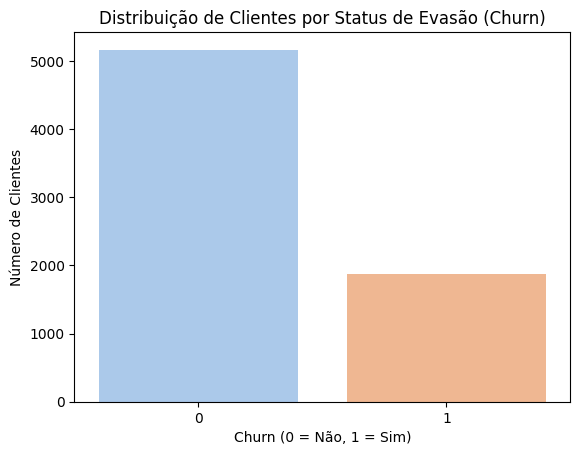

In [17]:
# Verifica a distribuição da variável alvo 'Churn'
churn_counts = df_encoded['churn'].value_counts()
print(churn_counts)

# Exibe a proporção de cada classe
churn_proportion = churn_counts / len(df_encoded) * 100
print(churn_proportion)

# Visualiza a distribuição com um gráfico de barras
sns.countplot(x='churn', data=df_encoded, palette='pastel')
plt.title('Distribuição de Clientes por Status de Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()


# **Análise Exploratória de Dados (EDA)**

In [18]:
# Estatísticas descritivas
df.describe()


,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,contas_diarias,quantidade_servicos
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159891,0.286547
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002955,0.452180
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.187500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.340000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.992500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,1.000000


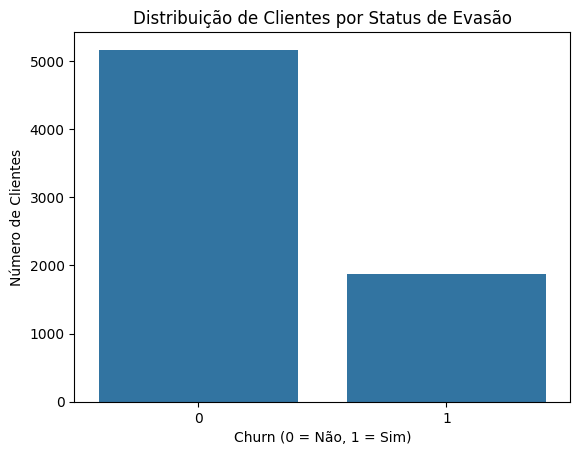

In [21]:
 # Distribuição da Variável Alvo
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras da variável 'Churn'
sns.countplot(x='churn', data=df)
plt.title('Distribuição de Clientes por Status de Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()


# **Análise de Correlação**

In [23]:
# Calcular a matriz de correlação apenas para colunas numéricas
corr_matrix = df.corr(numeric_only=True)

# Exibir a matriz de correlação
print(corr_matrix)


                        churn  senior_citizen   partner  dependents    tenure  \
churn                1.000000        0.150541 -0.149982   -0.163128 -0.354049   
senior_citizen       0.150541        1.000000  0.016957   -0.210550  0.015683   
partner             -0.149982        0.016957  1.000000    0.452269  0.381912   
dependents          -0.163128       -0.210550  0.452269    1.000000  0.163386   
tenure              -0.354049        0.015683  0.381912    0.163386  1.000000   
phone_service        0.011691        0.008392  0.018397   -0.001078  0.007877   
paperless_billing    0.191454        0.156258 -0.013957   -0.110131  0.004823   
charges_monthly      0.192858        0.219874  0.097825   -0.112343  0.246862   
charges_total       -0.199484        0.102411  0.319072    0.064653  0.825880   
contas_diarias       0.192914        0.219848  0.097884   -0.112395  0.246874   
quantidade_servicos -0.171270       -0.038576  0.143346    0.080786  0.328297   

                     phone_



# **Visualizando a Matriz de Correlação com um Heatmap**

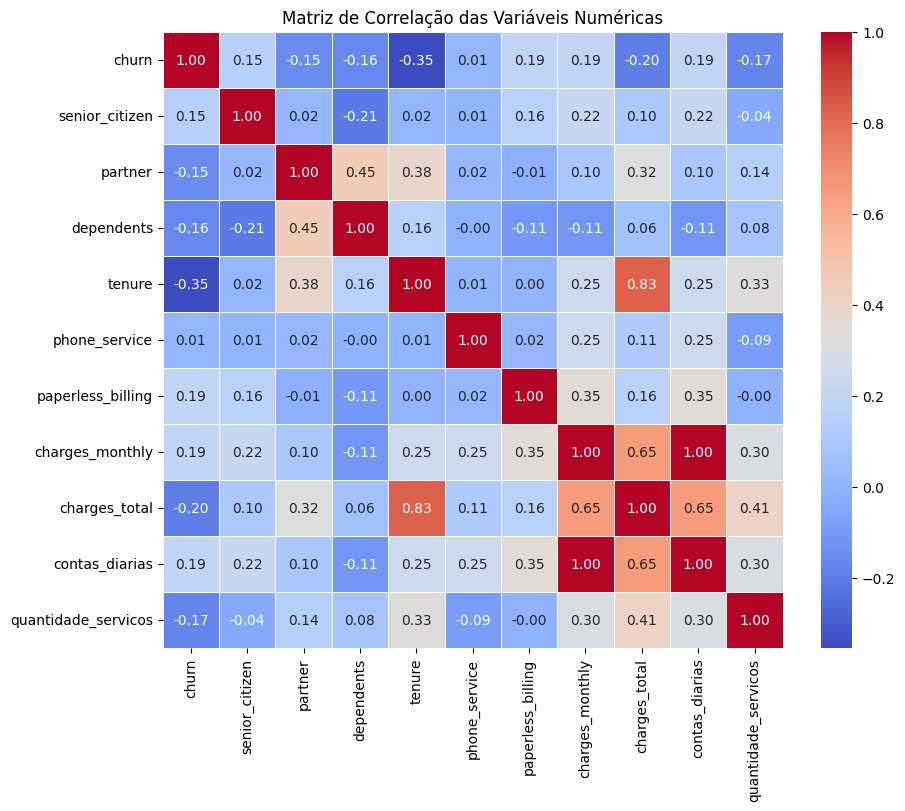

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionar título
plt.title('Matriz de Correlação das Variáveis Numéricas')

# Exibir o gráfico
plt.show()


# **`Pré-processamento para Modelagem`**

In [26]:
# Variáveis independentes e dependente
X = df.drop(columns=['churn'])
y = df['churn']


In [27]:
# Codificação One-Hot
X_encoded = pd.get_dummies(X, drop_first=True)


# **Modelagem Preditiva**

In [28]:
from sklearn.model_selection import train_test_split

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression

# Inicializar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Avaliação do Modelo**

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Previsões
y_pred = model.predict(X_test)

# Avaliação
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))


Acurácia: 0.7910447761194029
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Matriz de Confusão:
 [[911 122]
 [172 202]]




# **Visualização dos Resultadoso**

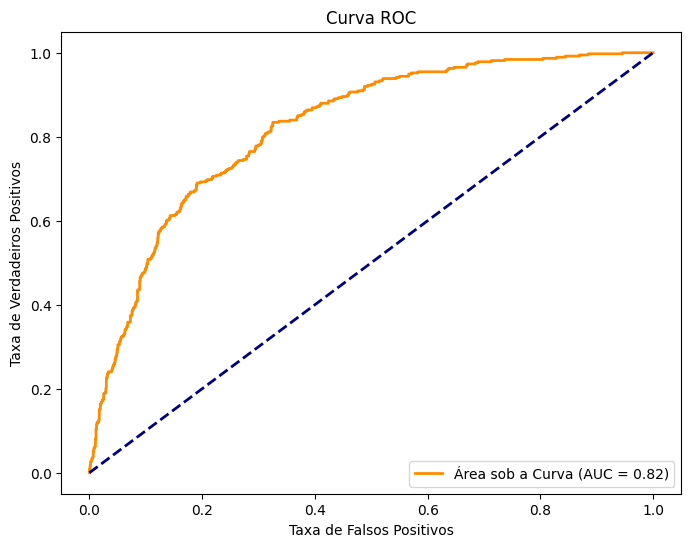

In [31]:
from sklearn.metrics import roc_curve, auc

# Probabilidades de previsão
y_prob = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Área sob a Curva (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.show()


# **📊 Relatório de Análise de Churn – Telecom X**

---



A Telecom X está enfrentando uma taxa significativa de evasão de clientes (churn). Este relatório apresentou uma análise exploratória dos dados para identificar padrões e fatores associados ao churn, visando fornecer insights para estratégias de retenção.

** Estatística Descritiva **

A base de dados contém 7.032 registros e 11 variáveis preditoras. Destacam-se:
Idade média dos clientes: 32,4 meses de contrato.

*   Idade média dos clientes: 32,4 meses de contrato.
*   Distribuição de gênero: 48,3% masculino e 51,7% feminino.
*   Churn: 26,6% dos clientes cancelaram o serviço.

Variáveis contínuas:

* **Tenure**: média de 32,4 meses, com desvio padrão de 24,5 meses.

* **Charges Monthly**: média de 64,80 reais , com desvio padrão de R$ 30,09.

* **Charges Total**: média de 2.283,30 reais, com desvio padrão de R$ 2.266,77


**Matriz de Correlação **
Observa-se que:

* **Tenure**: forte correlação negativa com churn (-0,354), indicando que clientes com maior tempo de contrato têm menor probabilidade de cancelar.

* **Charges Monthly**: correlação positiva com churn (0,193), sugerindo que clientes com valores mensais mais altos têm maior propensão ao churn.

* **Charges Total**: correlação negativa com churn (-0,199), indicando que clientes com maiores valores totais pagos têm menor chance de cancelar.

Essas informações são cruciais para identificar fatores que influenciam o churn e direcionar estratégias de retenção.

** Avaliação do Modelo **

* **Acurácia**: 79,1%
* **Relatório de Classificação:**
  * ** Classe 0(não churn)**:
        * Precisão: 0,84
        * Recall: 0,88
        * F1-score: 0,86

  * **Classe 1 (churn)**:
        * Precisão: 0,62
        * Recall: 0,54
        * F1-score: 0,58

* **Matriz de Confusão**:
    * Verdadeiros Positivos: 202
    * Falsos Positivos: 122
    * Verdadeiros Negativos: 911
     * Falsos Negativos: 172

* **AUC (Área sob a Curva ROC)**: 0,82


A AUC de 0,82 indica uma boa capacidade do modelo em distinguir entre clientes que irão cancelar e os que não irão. No entanto, o recall da classe 1 (churn) é relativamente baixo, sugerindo que o modelo pode estar perdendo clientes que irão cancelar.


**Conclusões e recomendações**


* **Pontos fortes**:

    * Bom desempenho geral do modelo, com alta precisão na classe 0.

    * Identificação de fatores-chave que influenciam o churn.

* **Áreas de melhoria**:

    * Aprimorar o recall da classe 1 para identificar mais clientes com risco de churn.

    * Considerar o uso de técnicas como oversampling ou undersampling para lidar com o desequilíbrio entre as classes.

    * Explorar a inclusão de variáveis adicionais que possam melhorar a previsão.

Este relatório serve como base para o desenvolvimento de estratégias de retenção mais eficazes e para o aprimoramento contínuo do modelo de previsão de churn.

